Start with your import statements and cost function

In [1]:
from mass_spring_damper import Mass_spring_damper
import numpy as np
import matplotlib.pyplot as pyplot

In [2]:
sys = Mass_spring_damper()

In [3]:
def J(x,x_des,u):
    Q = np.array([[2000,0],[0,100]])
    R = .00001
    cost = (x-x_des).T@Q@(x-x_des)+u*R*u
    return cost

Set initial states, inputs and parameters

In [4]:
h = .01 #derivative time step
x_des = np.array([[5],[0]]) #desired states
x = np.array([[0],[0]]) #initial state
u = 1 #initial input force
u_last = [u] #array to keep track of inputs
z_last = [x[0,0]] #array to keep track of positions
zd_last = [x[1,0]] #array to keep track of velocity
alpha = 5 #gradient descent parameter
i = 0 #time step
time = [0] #time
Ts = .01 #time step

Create loop to iterate over time steps. Inside the while loop, get the estimated derivative of the cost function and apply new u to the system.

In [5]:
while i <5000:

    dJ = (J(sys.get_next_xk(x,u+h),x_des,u+h)-J(sys.get_next_xk(x,u),x_des,u))/h #estimate partial of cost function
    
    newu = u-alpha*dJ #get new input
    u = newu[0,0] #needed to extract from array
    x = sys.get_next_xk(x,u) #apply new u to get x
    
    #save position, velocity, input and time and increment
    z_last.append(x[0,0])
    zd_last.append(x[1,0])
    u_last.append(u)
    i = i+1
    time.append(i*Ts)


Plot inputs and states over time

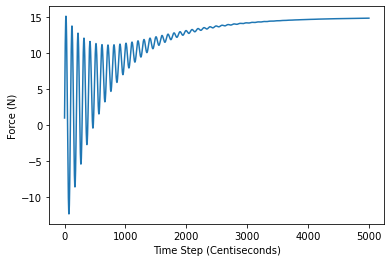

In [6]:
pyplot.plot(u_last)
pyplot.xlabel('Time Step (Centiseconds)')
pyplot.ylabel('Force (N)')
pyplot.show()

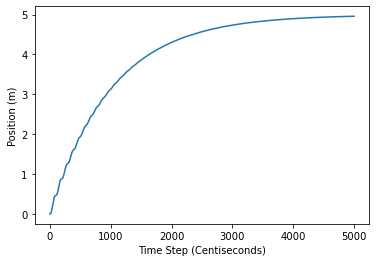

In [7]:
pyplot.plot(z_last)
pyplot.xlabel('Time Step (Centiseconds)')
pyplot.ylabel('Position (m)')
pyplot.show()

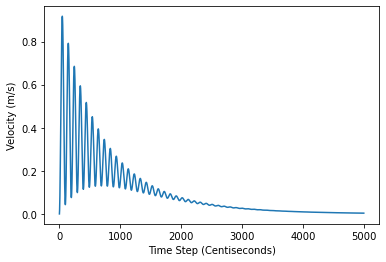

In [8]:
pyplot.plot(zd_last)
pyplot.xlabel('Time Step (Centiseconds)')
pyplot.ylabel('Velocity (m/s)')
pyplot.show()